Dans ce fichier, on va utiliser la méthode de cluster pour classifier les données à categories différents. Nous souhaitons déterminer s'il existe la même tendance de changement entre différents états

In [1]:
# Tout d'abord, nous devons lire les données, où l'emplacement du fichier change en fonction de notre propre situation

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

data = pd.read_csv("..\données\drought.csv")
data = data.drop(columns=['0','-9'])
data['DATE'] = pd.to_datetime(data['DATE'],format='d_%Y%m%d')
data['state'] =pd.Categorical(data['state'])
data['DSCI'] = data.D0 + data.D1 + data.D2 + data.D3 + data.D4

# Pour simplifier, nous étudions des séries temporelles univariées
data = data.drop(columns=['D0','D1','D2','D3','D4','W0','W1','W2','W3','W4'])
data

,DATE,state,DSCI
0,1895-01-01,alabama,0.0
1,1895-02-01,alabama,0.0
2,1895-03-01,alabama,0.0
3,1895-04-01,alabama,0.0
4,1895-05-01,alabama,0.0
...,...,...,...
73339,2021-12-01,wyoming,108.7
73340,2022-01-01,wyoming,85.7
73341,2022-02-01,wyoming,86.1
73342,2022-03-01,wyoming,50.0


Dans la première étape. Nous devons transformer les longues données en données larges pour utiliser les méthodes de cluster.

In [2]:
data = data[data.DATE >'2000-01-01']
data_wide = data.pivot_table(index='state',columns='DATE',values='DSCI')
data_wide

DATE,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,2000-11-01,...,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01
state,,,,,,,,,,,,,,,,,,,,,
alabama,211.6,383.3,330.6,324.3,287.1,372.1,403.8,370.1,429.1,214.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.3
arizona,76.6,47.5,164.9,246.4,290.9,345.0,201.9,200.2,7.0,11.4,...,52.6,57.0,29.3,25.4,23.3,5.3,13.2,20.4,30.3,132.4
arkansas,293.6,365.0,330.1,160.6,39.9,82.6,98.1,143.0,141.7,27.4,...,0.1,0.0,0.1,0.2,3.2,10.0,14.9,49.1,58.2,47.2
california,43.0,46.1,74.8,74.8,84.1,85.4,41.4,21.8,5.7,71.0,...,325.9,295.4,242.5,165.6,156.3,14.5,43.4,104.0,161.6,190.1
colorado,14.7,8.4,22.6,82.4,128.2,106.7,69.4,57.3,36.7,43.2,...,58.7,58.0,55.8,24.8,50.9,68.5,54.1,138.0,117.9,216.7
connecticut,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.6,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8
delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,1.5,131.1,19.7,33.1,90.0,127.1
florida,122.3,190.7,165.0,234.4,282.4,347.1,386.0,270.1,314.1,250.4,...,19.4,57.6,64.5,55.7,24.7,11.0,26.0,16.7,11.4,12.1
georgia,153.0,208.8,210.3,236.4,275.7,363.5,367.9,173.9,281.5,144.7,...,7.7,3.4,0.0,0.0,0.2,0.2,0.1,0.1,1.3,4.2


Le but de la normalisation est d'empêcher les variables avec de grands ordres de grandeur d'affecter les variables avec de petits ordres de grandeur.

In [3]:
# Standardiser les données

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_wide = scaler.fit_transform(data_wide)

In [4]:
# Ici, nous utilisons la méthode kmean pour le clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(scaled_data_wide)

print(clusters)

[4 5 0 6 6 1 0 4 4 3 7 7 7 2 0 5 1 0 1 7 2 0 7 2 2 6 1 1 5 1 0 2 7 5 3 1 1
 4 2 0 5 6 1 0 3 0 7 2]


D:\Programming\Conda_envs\SDW\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
from sklearn.cluster import AgglomerativeClustering

clusters2 = AgglomerativeClustering(n_clusters=8).fit_predict(scaled_data_wide)
print(clusters2)

[6 1 2 1 1 0 4 6 6 7 3 3 3 2 4 2 0 4 0 3 3 2 3 5 5 1 0 0 1 0 4 5 3 2 7 0 0
 4 5 4 2 1 0 4 7 4 3 5]


In [6]:
# Nous ajouterons les résultats obtenus aux données et reconvertirons les données en données longues pour faciliter le dessin

data_wide['clusters'] = clusters2
data_wide = data_wide.reset_index(drop=False)
data_long = pd.melt(data_wide,id_vars=['state','clusters'],value_name='DSCI')
data_long = data_long.sort_values(['state','DATE'],ascending=[True,True])
data_long.reset_index(drop=True)

,state,clusters,DATE,DSCI
0,alabama,6,2000-02-01,211.6
1,alabama,6,2000-03-01,383.3
2,alabama,6,2000-04-01,330.6
3,alabama,6,2000-05-01,324.3
4,alabama,6,2000-06-01,287.1
...,...,...,...,...
12811,wyoming,5,2021-12-01,108.7
12812,wyoming,5,2022-01-01,85.7
12813,wyoming,5,2022-02-01,86.1
12814,wyoming,5,2022-03-01,50.0


In [7]:
data_long.state[data_long.clusters==0].unique()

['connecticut', 'maine', 'massachusetts', 'new-hampshire', 'new-jersey', 'new-york', 'pennsylvania', 'rhode-island', 'vermont']
Categories (48, object): ['alabama', 'arizona', 'arkansas', 'california', ..., 'washington', 'west-virginia', 'wisconsin', 'wyoming']

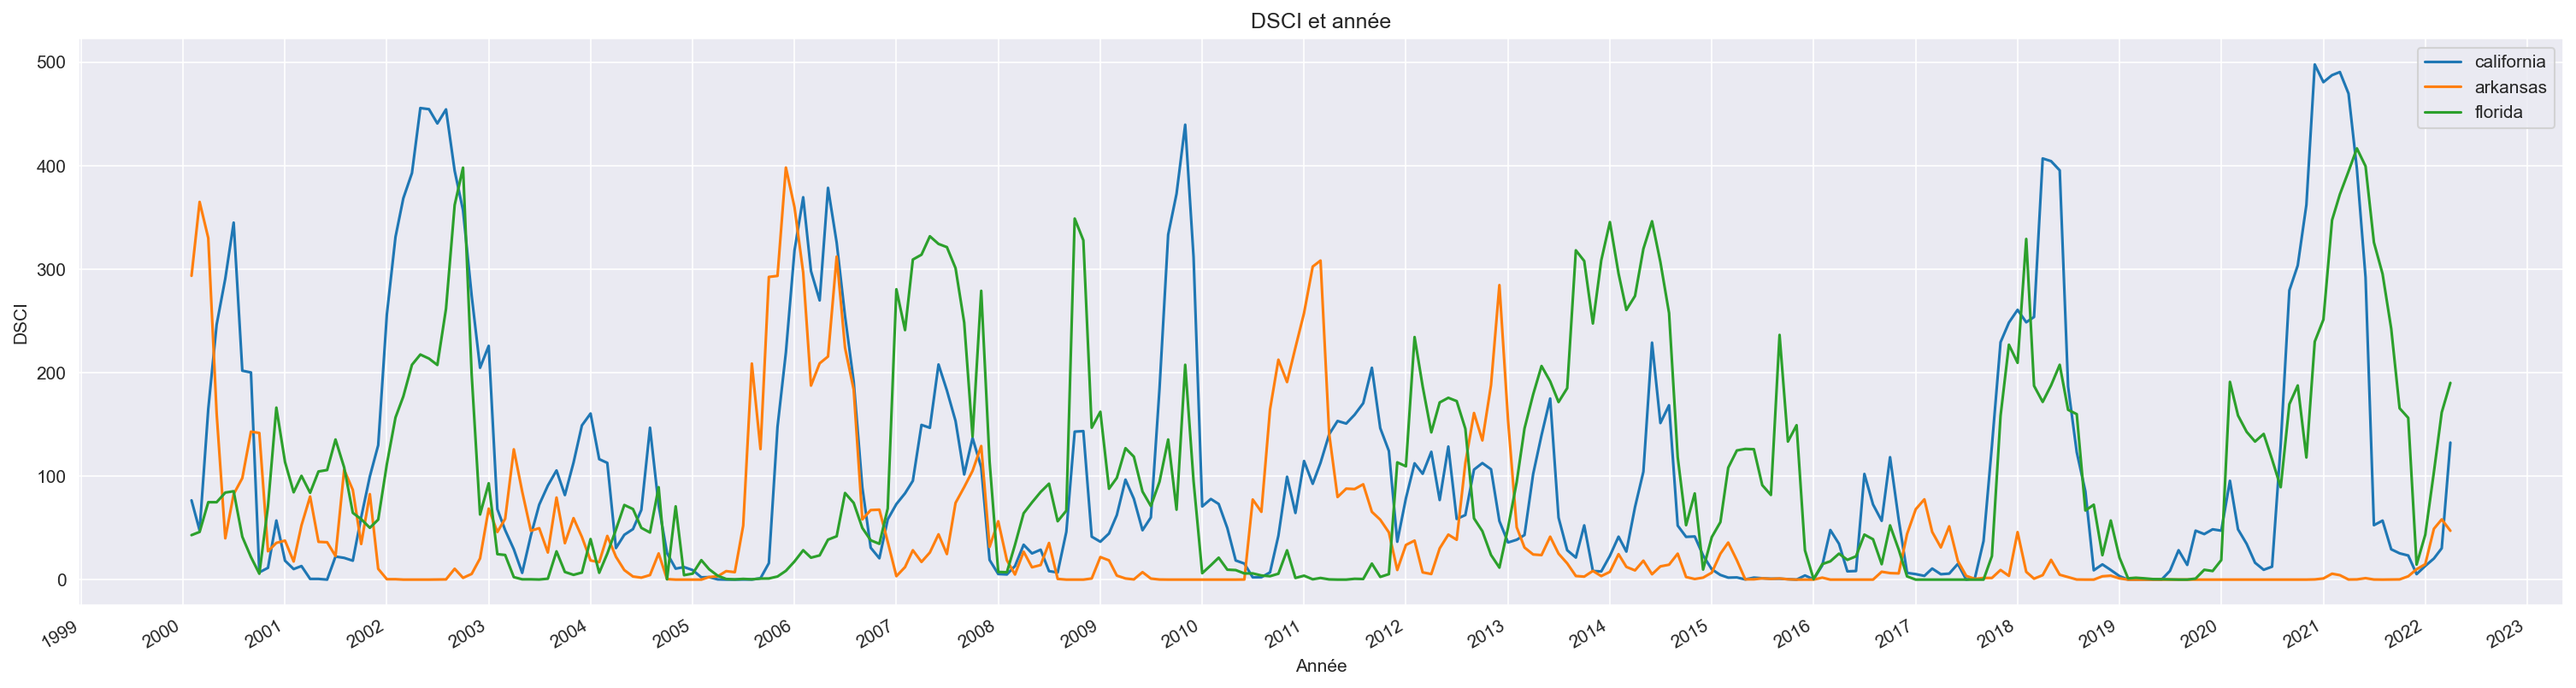

In [8]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
years = mdates.YearLocator(base=1)
x = data.DATE[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y0 = data.DSCI[(data.state=='arizona') & (data.DATE >'2000-01-01')]
y1 = data.DSCI[(data.state=='arkansas') & (data.DATE >'2000-01-01')]
y2 = data.DSCI[(data.state=='california') & (data.DATE >'2000-01-01')]
line0, = ax.plot(x,y0)
line1, = ax.plot(x,y1)
line2, = ax.plot(x,y2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
# ax.fill_between(x, 0, y)
ax.set_title('DSCI et année')
ax.set_xlabel('Année')
ax.set_ylabel('DSCI')
plt.legend(handles=[line0, line1, line2], labels=['california', 'arkansas', 'florida'])

2. La deuxième étape consiste à prédire
Pour une série temporelle, nous nous soucions d'abord de savoir si elle est périodique et jugeons si elle est stationnaire.
Nous pouvons tracer le graphique du coefficient d'autocorrélation pour voir s'il existe une telle tendance
La definition d'autocorrélation: https://fr.wikipedia.org/wiki/Autocorr%C3%A9lation
La definition de Stationnarité https://fr.wikipedia.org/wiki/Stationnarit%C3%A9_d%27une_s%C3%A9rie_temporelle
Une example: https://www.actuia.com/actualite/les-series-temporelles-preparation-et-exploration-des-donnees/

On peut voir que le graphique du coefficient d'autocorrélation a des fluctuations sinusoïdales évidentes et ne se réduit pas à 0, ce qui montre que les données ne sont pas stationnaires et ont une périodicité
Lorsque nous utilisons des modèles d'apprentissage automatique traditionnels pour faire des prévisions, le lissage des séries chronologiques peut améliorer la précision des prévisions
Par conséquent, nous devons stabiliser cette série temporelle non stationnaire et la décomposer via Time-series Decomposition
La méthode de décomposition des séries chronologiques décompose la série originale en 3 séries :Séries tendancielles, séries saisonnières, séries résiduelles